In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
waloc = pd.read_csv('/Users/Yuval/Desktop/Thesis/all-wa-pos.csv')#use this for all 297 towns
waloc = waloc.loc[waloc['Population'] >0]
# When doing big towns
waloc = waloc[:58]

# When ignoring sattelite towns
waloc = waloc.loc[(waloc['City / Town'] != 'Yanchep') & (waloc['City / Town'] != 'Bullsbrook') &
                  (waloc['City / Town'] != 'Mundijong') & (waloc['City / Town'] != 'Serpentine') &
                 (waloc['City / Town'] != 'Two Rocks') ]
waloc = waloc.reset_index()
waloc = waloc.drop(columns = ['index'])

# When also ignoring rural sattelite towns
waloc = waloc.loc[(waloc['City / Town'] != 'Pinjarra') & (waloc['City / Town'] != 'Drummond Cove') &
                  (waloc['City / Town'] != 'Bridgetown') & (waloc['City / Town'] != 'Binningup') &
                 (waloc['City / Town'] != 'Dampier') ]
waloc = waloc.reset_index()
waloc = waloc.drop(columns = ['index'])

# When also ignoring 0 flow towns
waloc = waloc.loc[(waloc['City / Town'] != 'Kununurra') & (waloc['City / Town'] != 'Derby') &
                  (waloc['City / Town'] != 'Boddington-Ranford') & (waloc['City / Town'] != 'Wyndham')]
waloc = waloc.reset_index()
waloc = waloc.drop(columns = ['index'])

towns = list(waloc['City / Town'])

In [3]:
## WA Data Processing
wa_data = pd.read_csv('/Users/Yuval/Desktop/Thesis/wa_health.csv')

# Daily cases
wa_totals = list(wa_data.iloc[0])[1:]
wa_totals = [i - 1134 for i in wa_totals]
wa_infs = [0]
for i in range(1,len(wa_totals)):
    wa_infs.append(wa_totals[i]-wa_totals[i-1])
    
total_popn = sum(list(waloc['Population']))

# WA's population is 2491996 people over 5
# https://www.health.gov.au/sites/default/files/documents/2022/02/covid-19-vaccine-rollout-update-1-february-2022.pdf
# There are 377018 people between 5-15, so normalise the third dose based on that

first = list(wa_data.loc[wa_data['Source'] == 'COVID-live First Doses 5+'].iloc[0])[1:]
first = [round(i/2491996*total_popn) for i in first]
first_change = []
for f in range(len(first)-1):
    first_change.append(first[f+1] - first[f])

second = list(wa_data.loc[wa_data['Source'] == 'COVID-live Second Doses 5+'].iloc[0])[1:]
second = [round(i/2491996*total_popn) for i in second]
second_change = []
for f in range(len(second)-1):
    second_change.append(second[f+1] - second[f])

third = list(wa_data.loc[wa_data['Source'] == 'COVID-live Booster Doses 16+'].iloc[0])[1:]
third = [round(i*2491996/(2491996-377018)) for i in third]
third = [round(i/2491996*total_popn) for i in third]
third_change = []
for f in range(len(third)-1):
    third_change.append(third[f+1] - third[f])

uptakes = [first_change, second_change, third_change]

In [4]:
from datetime import datetime, timedelta

def date_range(start, end):
    delta = end - start  # as timedelta
    days = [start + timedelta(days=i) for i in range(delta.days + 1)]
    return days

start_date = datetime(2021, 12, 21)
end_date = datetime(2022, 5, 10)
    
dateslist = date_range(start_date, end_date)

months = []
for name in dateslist:
    name = str(name)
    m = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
    mo = int(name[5:7])
    ye = int(name[2:4])
    
    date = str(m[mo-1]) + ' ' + str(ye)
    if date in months:
        months.append('')
    else:
        months.append(date)

In [5]:
print([(total_popn-first[i])/total_popn*100 for i in range(141)][70])
print([(first[i]-second[i])/total_popn*100 for i in range(141)][70])
print([(second[i]-third[i])/total_popn*100 for i in range(141)][70])
print([(third[i])/total_popn*100 for i in range(141)][70])

7.655596596775327
7.493677561531635
22.418386738093233
62.43233910359981


In [9]:
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

Text(0.5, 0, 'Date')

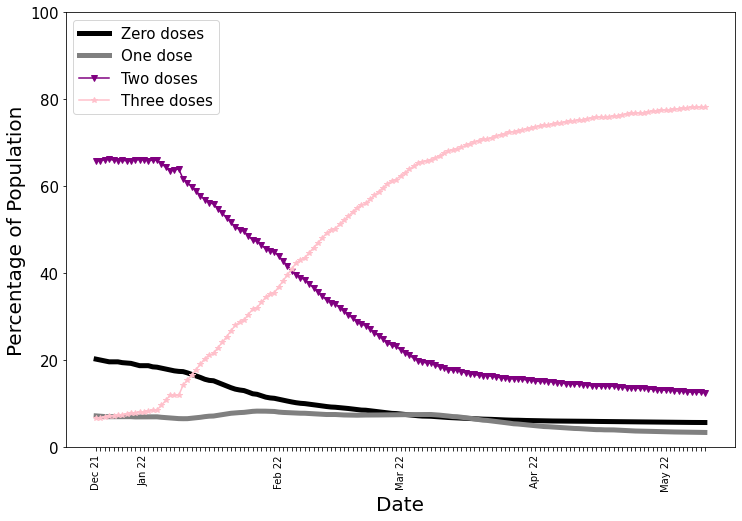

In [22]:
plt.figure(figsize = (12,8))
plt.plot([(total_popn-first[i])/total_popn*100 for i in range(141)], lw= 5, label = 'Zero doses', color = 'black')
plt.plot([(first[i]-second[i])/total_popn*100 for i in range(141)], lw = 5, label = 'One dose', color = 'gray')
plt.plot([(second[i]-third[i])/total_popn*100 for i in range(141)], marker = 'v', label = 'Two doses', color = 'purple')
plt.plot([(third[i])/total_popn*100 for i in range(141)], label = 'Three doses', marker ='*', color = 'pink')
plt.legend(fontsize = 15)
plt.ylim(0,100)
plt.xticks([i for i in range(141)],months,rotation = 90,fontsize = 10)
plt.ylabel('Percentage of Population',fontsize = 20)
plt.xlabel('Date', fontsize = 20)

In [23]:
third[-1]/total_popn

0.783410043695002

In [24]:
# Find initial values

init_first_dose = list(wa_data.loc[wa_data['Source'] == 'COVID-live First Doses 5+'].iloc[0])[1]
init_first_dose = init_first_dose/2491996
init_second_dose = list(wa_data.loc[wa_data['Source'] == 'COVID-live Second Doses 5+'].iloc[0])[1]
init_second_dose = init_second_dose/2491996
init_third_dose = list(wa_data.loc[wa_data['Source'] == 'COVID-live Booster Doses 16+'].iloc[0])[1]
init_third_dose = init_third_dose*2491996/(2491996-377018)
init_third_dose = init_third_dose/2491996

init1 = init_first_dose- init_second_dose
init2 = init_second_dose - init_third_dose
init3 = init_third_dose

In [25]:
print(1-init1-init2-init3, init1, init2,init3)

0.20269735585450377 0.07219835023812238 0.6579366921639987 0.06716760174337512


In [26]:
second[-1]/total_popn

0.9088730670887883

In [27]:
deltas = [(0.435+0.449)/2,(0.448+0.462)/2,(0.897+0.912)/2,(0.560+0.573)/2]
inflection_points = [0, 16, 44, 80]

In [28]:
deltas

[0.442, 0.455, 0.9045000000000001, 0.5665]

In [29]:
good_profile = []
R0_delta = []
for d in deltas:
    R0s = []
    for i in range(len(first)):
        V0 = (total_popn-first[i])/total_popn
        V1 = (first[i]-second[i])/total_popn
        V2 = (second[i]-third[i])/total_popn
        V3 = third[i]/total_popn
        R0 = d*3.778*(V0 + 0.707*V1 + 0.874*V2 + 0.434*V3)*(V0+V1+V2+V3)
        R0s.append(R0)
        if R0 < 1:
            good_profile.append('yes')
        else:
            good_profile.append('no')
    R0_delta.append(R0s)

In [30]:
R0_delta[1][75]

0.9993625217462153

In [31]:
inf0 = inflection_points[0]
inf1 = inflection_points[1]
inf2 = inflection_points[2]
inf3 = inflection_points[3]

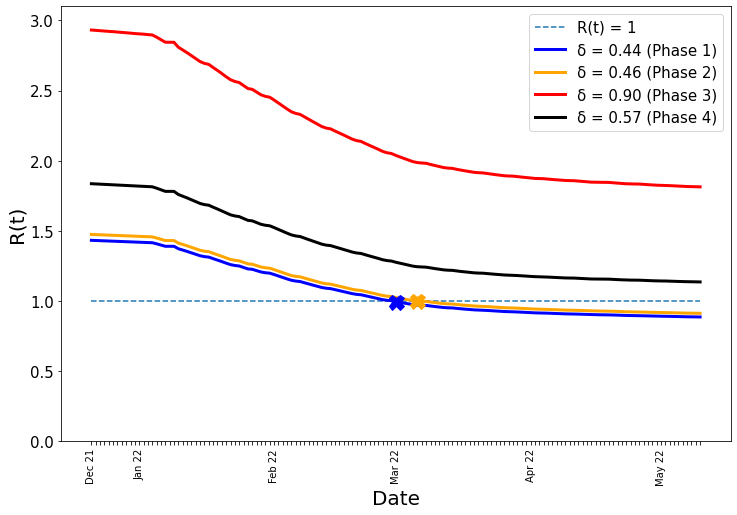

In [41]:
plt.figure(figsize = (12,8))
plt.plot([0,140],[1,1], linestyle = 'dashed', label = 'R(t) = 1')
plt.plot(R0_delta[0],color = 'blue', lw = 3, label = 'δ = ' + str(round(deltas[0],2)) + ' (Phase 1)')
plt.plot(R0_delta[1],color = 'orange', lw = 3,label = 'δ = ' + str(round(deltas[1],2)) + ' (Phase 2)')
plt.plot(R0_delta[2],color = 'red', lw = 3,label = 'δ = ' + str(round(deltas[2],2)) + '0 (Phase 3)')
plt.plot(R0_delta[3],color = 'black',lw = 3,label = 'δ = ' + str(round(deltas[3],2)) + ' (Phase 4)')
plt.plot(70, R0_delta[0][70], marker="X", markersize=15, color = 'blue')
plt.plot(75, R0_delta[1][75], marker="X", markersize=15, color = 'orange')
plt.ylabel('R(t)',fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.xticks([i for i in range(141)],months,rotation = 90,fontsize = 10)
plt.ylim(0,3.1)
plt.legend(fontsize = 15)

In [104]:
good_profile.index('yes')

70

In [110]:
wa_data.iloc[0][71]-wa_data.iloc[0][70]

2560.0

In [95]:
0.442*3.778*(V0 + 0.707*V1 + 0.874*V2 + 0.434*V3)*(V0+V1+V2+V3)

4.227069163730984

In [ ]:
# plt.plot(inf1, R0_delta[1][inf1], marker="o", markersize=10, color = 'orange')
# plt.plot(inf2, R0_delta[2][inf2], marker="o", markersize=10, color = 'green')
# plt.plot(inf3, R0_delta[3][inf3], marker="o", markersize=10, color = 'red')
# plt.plot([i for i in range(inf0,inf1)],R0_delta[0][inf0:inf1],color = 'black')
# plt.plot([i for i in range(inf1,inf2)],R0_delta[1][inf1:inf2],color = 'black')
# plt.plot([i for i in range(inf2,inf3)],R0_delta[2][inf2:inf3],color = 'black')
# plt.plot([i for i in range(inf3,141)],R0_delta[3][inf3:],color = 'black')
# plt.plot([inf1-1,inf1],[R0_delta[0][inf1-1],R0_delta[1][inf1]],color = 'black' )
# plt.plot([inf2-1,inf2],[R0_delta[1][inf2-1],R0_delta[2][inf2]],color = 'black' )
# plt.plot([inf3-1,inf3],[R0_delta[2][inf3-1],R0_delta[3][inf3]],color = 'black' )

In [93]:
len(good_profile)

141

In [156]:
Vacc0 = [0.05 + 0.01*i for i in range(16)]
Vacc1 = [0.01*i for i in range(28)]
Vacc2 = [0.01*i for i in range(94)]
Vacc3 = [0.07 + 0.01*i for i in range(94)]

allyes = []
for delta in deltas:
    yes = []
    for V0 in Vacc0:
        for V1 in Vacc1:
            for V2 in Vacc2:
                for V3 in Vacc3:
                    if (V0+V1+V2+V3 == 1) and (V0+V1 <= 0.27) and (V0+V1+V2 <= 0.93):
                        #print(V0, V1, V2, V3)
                        R0 = delta*3.778*(V0 + 0.707*V1 + 0.874*V2 + 0.434*V3)*(V0+V1+V2+V3)
                        if R0 < 1:
                            yes.append([V0,V1,V2,V3])
    allyes.append(yes)

In [181]:
zipped = list(zip(*allyes[3]))

In [182]:
len(allyes[3])

3

In [183]:
zipped[3].index(min(zipped[3]))

1

In [184]:
allyes[1][1]

[0.05, 0.0, 0.01, 0.94]

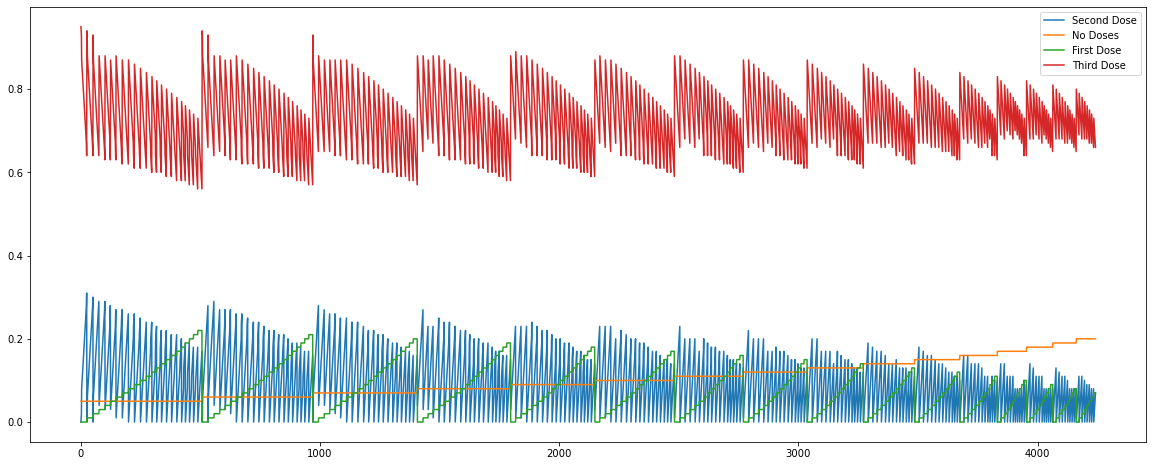

In [90]:
#plt.plot(zipped[0],zipped[1],zipped[2],zipped[3])
plt.figure(figsize = (20,8))
plt.plot(zipped[2], label = 'Second Dose')
plt.plot(zipped[0], label = 'No Doses')
plt.plot(zipped[1], label = 'First Dose')
plt.plot(zipped[3], label = 'Third Dose')
plt.legend()

In [63]:
zipped[3].index(min(zipped[3]))

708

In [64]:
print(zipped[0][708],zipped[1][708],zipped[2][708],zipped[3][708])

0.0 0.26 0.21 0.53


In [71]:
Vacc0 = [0.01*i for i in range(94)]
#Vacc1 = [0.01*i for i in range(28)]
#Vacc2 = [0.01*i for i in range(94)]
Vacc3 = [0.07 + 0.01*i for i in range(94)]

yes = []
for V0 in Vacc0:
        for V3 in Vacc3:
            if V0+V3 == 1:
                #print(V0, V1, V2, V3)
                R0 = 0.442*3.778*(V0+ 0.434*V3)*(V0+V3)
                if R0 < 1:
                    yes.append([V0,V3])

In [72]:
zipped = list(zip(*yes))

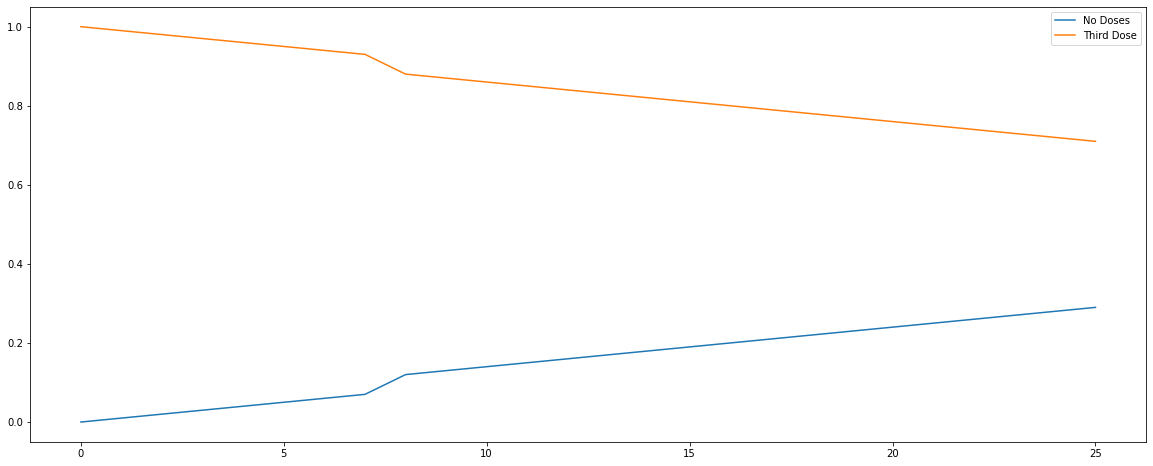

In [73]:
#plt.plot(zipped[0],zipped[1],zipped[2],zipped[3])
plt.figure(figsize = (20,8))
plt.plot(zipped[0], label = 'No Doses')
plt.plot(zipped[1], label = 'Third Dose')
plt.legend()

In [75]:
zipped[1].index(min(zipped[1]))

25

In [77]:
print(zipped[0][25],zipped[1][25])

0.29 0.71


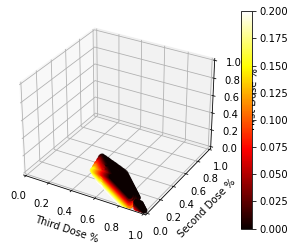

In [62]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = zipped[3]
y = zipped[2]
z = zipped[1]
c = zipped[0]

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
plt.xlim(0,1)
plt.xlabel('Third Dose %')
plt.ylabel('Second Dose %')
ax.set_zlabel('First Dose %')
plt.ylim(0,1)
ax.set_zlim(0,1)
fig.colorbar(img)
plt.show()

In [46]:
zipped[3].index(min(zipped[3]))

708

In [47]:
zipped[3][708]

0.53

In [34]:
print(zipped[0][76],zipped[1][76],zipped[2][76],zipped[3][76])

0.0 0.18 0.26 0.56


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# create some fake data
x = y = np.arange(-4.0, 4.0, 0.02)
# here are the x,y and respective z values
X, Y, Z = np.meshgrid(zipped[1], zipped[2],zipped[3])
#Z = np.sinc(np.sqrt(X*X+Y*Y))
# this is the value to use for the color
V = np.sin(Y)

# create the figure, add a 3d axis, set the viewing angle
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45,60)

# here we create the surface plot, but pass V through a colormap
# to create a different color for each patch
ax.plot_surface(zipped[1], zipped[2], zipped[3])

In [32]:
Z.shape

(400, 400)

In [19]:
min(list(zip(*yes))[3])

0.56